# Testing Beamshape Package

Import Things

In [88]:
import imageio.v3 as iio
import laserbeamsize as lbs
import numpy as np

import matplotlib.pyplot as plt

Folder where images are stored 

In [89]:
repo = 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Images/'

Pixel size - from auto calibration in ImageJ

In [90]:
pixel_size_µm = 1 / 2.8704

Going to try and replicate beam waist fit using this package!

In [91]:
# array of distances at which images were collected
z1 = np.array([20.8, 19.2, 17.6, 16,  14.4, 12.8, 11.2,  9.6,  8,   6.4,  4.8,  3.2,  1.6,  0, -1.6, -3.2, -4.8 ,-6.4, -8, -9.6],dtype=float) # um

# array of filenames associated with each image
fn1 = [repo + "%dum.pgm" % number for number in z1]
print(fn1)

['C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Images/20um.pgm', 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Images/19um.pgm', 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Images/17um.pgm', 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Images/16um.pgm', 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Images/14um.pgm', 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Images/12um.pgm', 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Bac

Crop Images

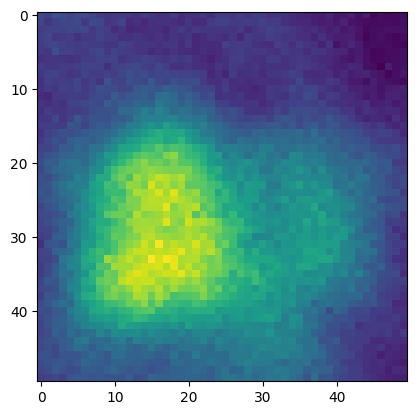

In [92]:
# Read in all images
test_img = np.array([iio.imread(fn) for fn in fn1])

# Set cropping coords
coords = (325,375,200,250) # y1,y2,x1,x2

coords1 = (325,400,200,250) # y1,y2,x1,x2

c_ims = []

for i in range(test_img.shape[0]): # for number of images

    # try to crop image

    if i < 6:
        c_ims.append(test_img[i,coords[0]:coords[1],coords[2]:coords[3]])

    else:
        c_ims.append(test_img[i,coords1[0]:coords1[1],coords1[2]:coords1[3]])

plt.imshow(c_ims[0])


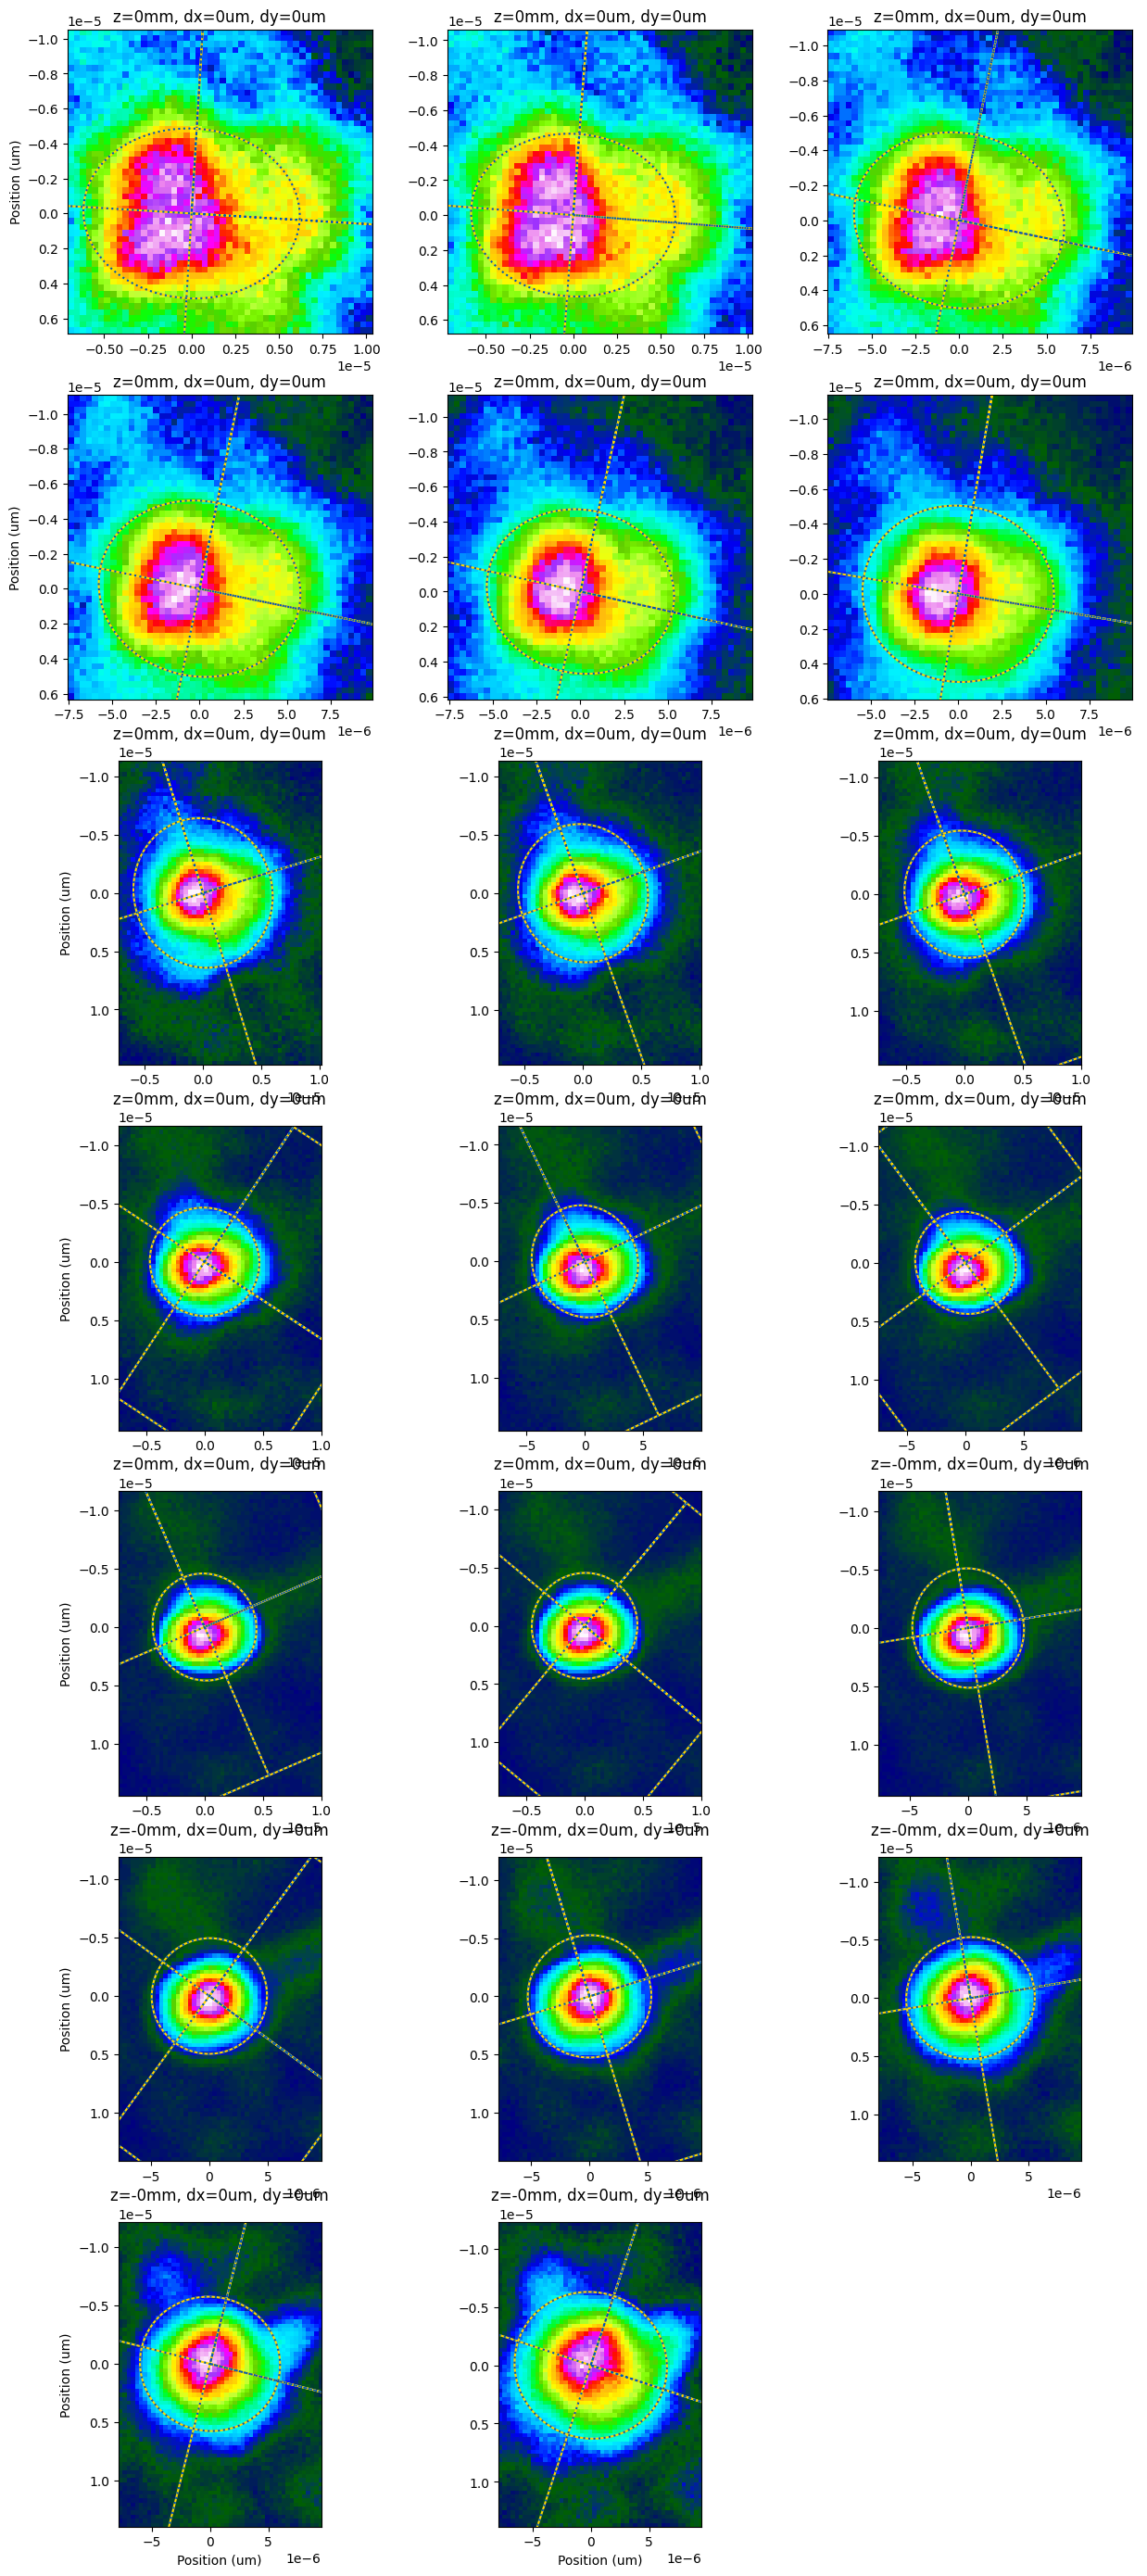

In [93]:
dx,dy=lbs.plot_image_montage(c_ims, z=z1*1e-6, pixel_size=pixel_size_µm*1e-6, units='um', iso_noise=False)
plt.show()

rx = dx/2
ry = dy/2

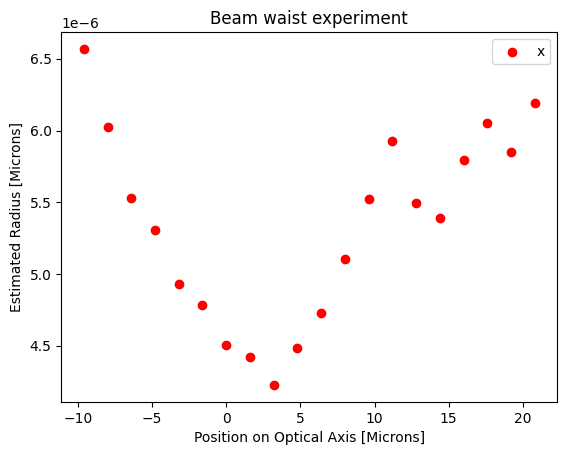

In [94]:
plt.scatter(z1, rx, color='red', label='x')
# plt.scatter(z1, ry, color='blue', label='y')
# plt.scatter(z1, np.mean((rx,ry), axis = 0), color='green', label='Mean')

plt.xlabel('Position on Optical Axis [Microns]')
plt.ylabel('Estimated Radius [Microns]')
plt.title("Beam waist experiment")
plt.legend()
plt.show()